# K-means & Penguins

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [36]:
data = sns.load_dataset("penguins")
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## Inspect data

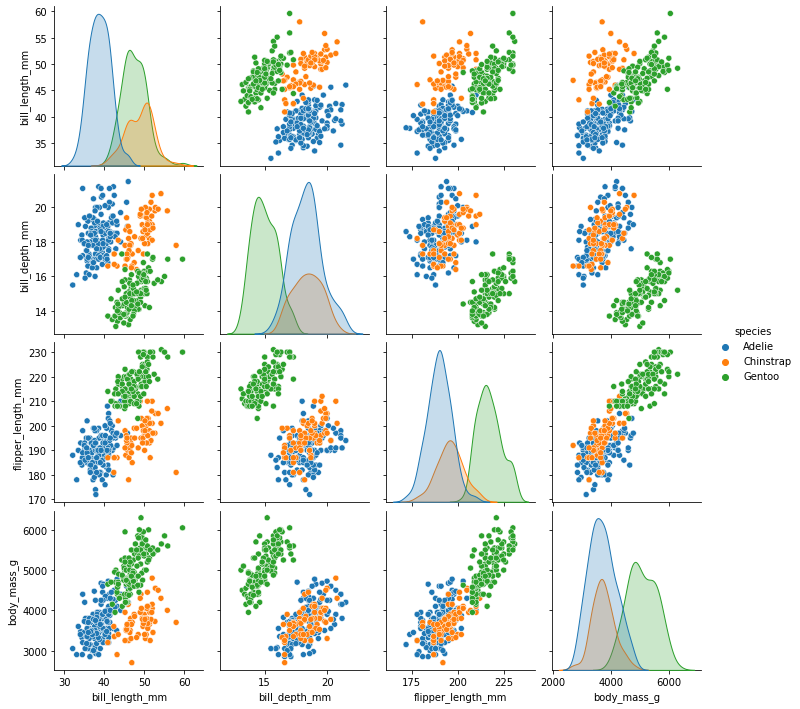

In [37]:
sns.pairplot(data, hue = "species");

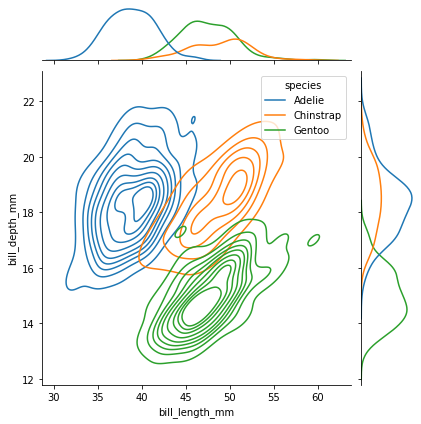

In [38]:
sns.jointplot(data = data, x = "bill_length_mm", y = "bill_depth_mm", hue = "species", kind = "kde");

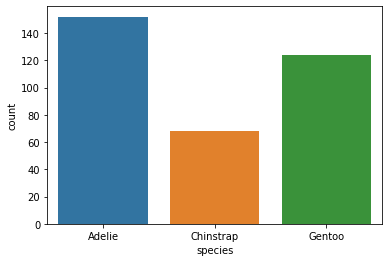

In [39]:
sns.countplot(x = "species", data = data);

### Drop NaN

In [40]:
print(f"Shape of data before dropping NA: {data.shape}")
data.isnull().sum()

Shape of data before dropping NA: (344, 7)


species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [41]:
data = data.dropna()
print(f"Shape of data after dropping NA: {data.shape}")

Shape of data after dropping NA: (333, 7)


### Encoding categorical values

In [42]:
#Vi exkluderar islands då vi har fler än 2 kategoriska variabler
print(f"Unique islands: {data['island'].unique()}")
data.pop('island');

Unique islands: ['Torgersen' 'Biscoe' 'Dream']


In [43]:
pd.options.mode.chained_assignment = None # to overwrite 'sex' column values warning

#Encoder till kategorisk variabel sex
sex_encoder = LabelEncoder().fit(data['sex'])

#Applicera sex_encoder för att få numerisk data
data['sex'] = sex_encoder.transform(data['sex'])
data.head()


,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,39.1,18.7,181.0,3750.0,1
1,Adelie,39.5,17.4,186.0,3800.0,0
2,Adelie,40.3,18.0,195.0,3250.0,0
4,Adelie,36.7,19.3,193.0,3450.0,0
5,Adelie,39.3,20.6,190.0,3650.0,1


In [44]:
# target
labels = data.pop("species")

## K-means clustering

In [45]:
# Clustering with 3 clusters
kmeans = KMeans(n_clusters=3)
pred_labels = kmeans.fit_predict(data)

In [46]:
# We plot a cross tab matrix to check how well has our K-Means model classified the Species
matrix = pd.DataFrame({'pred_species': pred_labels, 'species': labels})
ct = pd.crosstab(matrix['pred_species'], matrix['species'])
print(ct)
# Not very accurate

species       Adelie  Chinstrap  Gentoo
pred_species                           
0                108         52       1
1                  0          0      70
2                 38         16      48


### Standardize data

Look att the scatterplot and how body_mass_g is in a scale between 2000 and 6000 while bill_depth_mm is between 15 and 20. K-means without scaling will see bill_depth_mm as one cluster compared to body_mass_g as very separated. So we need to standardize the data.

In [47]:
data = (data-data.mean())/data.std()

In [49]:
# Clustering with 3 clusters with standardization
kmeans = KMeans(n_clusters=3)
pred_labels = kmeans.fit_predict(data)
matrix = pd.DataFrame({'pred_species': pred_labels, 'species': labels})
ct = pd.crosstab(matrix['pred_species'], matrix['species'])
print(ct)
# Much better. All Gentoo suceeded, but still problems with Adelie and Chinstrap. Wrong number of clusters?

species       Adelie  Chinstrap  Gentoo
pred_species                           
0                  0          0     119
1                 73         34       0
2                 73         34       0


## The Elbow method
For determing the optimal number of clusters by calculate the Within-Cluster-Sum of Squared Errors (WSS) for different values of K, and choose the K for which WSS becomes first starts to diminish. In the plot of WSS-versus-K, this is visible as an elbow.



## The Silhouette Method
For determing the optimal number of clusters. The silhouette value measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation). Silhouette score is between +1 and -1. A high value is desired.


In [50]:
# Determing number of clusters
wss = []
silhouette = []
min_clusters = 2
max_clusters = 10
for k in range(min_clusters,max_clusters):
    kmeans = KMeans(n_clusters = k).fit(data)
    wss.append(kmeans.inertia_) # The elbow method
    silhouette.append(silhouette_score(data, kmeans.labels_)) # Silhouette score

Silhouette scores: [0.44398088353055243, 0.45101024097188364, 0.5080140996630784, 0.519998574860868, 0.5263224884981607, 0.47774022332151744, 0.4182607727437792, 0.35955501262834577]


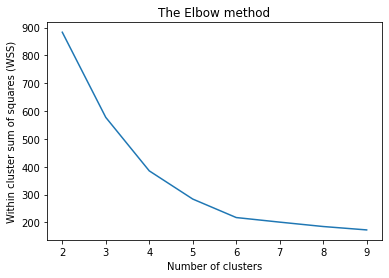

In [51]:
# The elbow method
plt.plot(np.arange(min_clusters, max_clusters), wss)
plt.title("The Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("Within cluster sum of squares (WSS)");

Silhouette scores: [0.44398088353055243, 0.45101024097188364, 0.5080140996630784, 0.519998574860868, 0.5263224884981607, 0.47774022332151744, 0.4182607727437792, 0.35955501262834577]


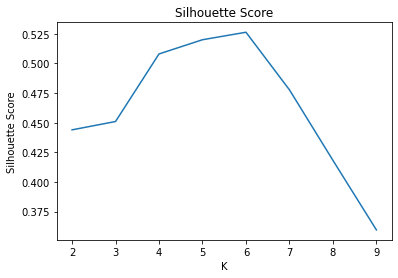

In [54]:
# Silhouette scores
print(f"Silhouette scores: {silhouette}")

plt.plot(np.arange(min_clusters, max_clusters), silhouette)
plt.title("Silhouette Score")
plt.xlabel("K")
plt.ylabel("Silhouette Score");

Silhouette score och elbow method tyder på 6 kluster. Kanske 3 species * n_sex? (= 6)

In [61]:
# Try for 6 clusters
kmeans = KMeans(n_clusters=6)
pred_labels = kmeans.fit_predict(data)
matrix = pd.DataFrame({'pred_species': pred_labels, 'species': labels})
ct = pd.crosstab(matrix['pred_species'], matrix['species'])
print(ct)

species       Adelie  Chinstrap  Gentoo
pred_species                           
0                  0          0      58
1                 71          0       0
2                  0          0      61
3                 73          5       0
4                  0         29       0
5                  2         34       0


In [62]:
# Compare with same plot using sex. We can see the theory is correct!
matrix = pd.DataFrame({'pred_species': pred_labels, 'sex': data['sex']})
ct = pd.crosstab(matrix['pred_species'], matrix['sex'])
ct

sex,-1.007534,0.989542
pred_species,,
0,58,0
1,0,71
2,0,61
3,78,0
4,29,0
5,0,36


In [20]:
#... och gör igen. Spara bästa inställningar baserat på silhouette score. Jämför med plot med elbow rule.
sse = []
silhouette = []
min_clusters = 2
max_clusters = 10

best_silhouette = -1
best_settings_silhouette = None
for i in range(min_clusters,max_clusters):
    kmeans = KMeans(n_clusters = i).fit(data)
    sse.append(kmeans.inertia_)
    silhouette_score_ = silhouette_score(data, kmeans.labels_)
    silhouette.append(silhouette_score_)

    if silhouette_score_ > best_silhouette:
        best_settings_silhouette = {"Clusters": i, "Score": silhouette_score_, "Centers": kmeans.cluster_centers_}
        best_silhouette = silhouette_score_

Silhouette scores: [0.44398088353055243, 0.45101024097188364, 0.5080140996630784, 0.519998574860868, 0.5263224884981607, 0.47386350642293157, 0.4226922929683247, 0.35713750726540655]


In [74]:
print(data.head())

print(list(best_settings_silhouette.values()))

# Silhouette score och eventuellt elbow rule tyder på 6 kluster. Kanske 3 species * n_sex? 

   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g       sex
0       -0.894695       0.779559          -1.424608    -0.567621  0.989542
1       -0.821552       0.119404          -1.067867    -0.505525 -1.007534
2       -0.675264       0.424091          -0.425733    -1.188572 -1.007534
4       -1.333559       1.084246          -0.568429    -0.940192 -1.007534
5       -0.858123       1.744400          -0.782474    -0.691811  0.989542
[6, 0.5263224884981607, array([[ 1.24578094,  1.0870669 , -0.09277412, -0.31665266,  0.98954206],
       [ 1.00225089, -0.73471766,  1.4679196 ,  1.58687771,  0.98954206],
       [-1.17250182,  0.20859677, -0.94895284, -1.04806193, -1.00753373],
       [ 0.28727292, -1.48633004,  0.83762316,  0.58702812, -1.00753373],
       [-0.68711088,  0.95264393, -0.61666439, -0.20773105,  0.98954206],
       [ 0.60664714,  0.27524981, -0.58565095, -0.79137725, -1.00753373]])]
